<a href="https://colab.research.google.com/github/Krishnan9074/.0/blob/master/GrammerScoreAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()


Kaggle credentials set.
Kaggle credentials successfully validated.


In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

shl_intern_hiring_assessment_path = kagglehub.competition_download('shl-intern-hiring-assessment')

print('Data source import complete.')


100%|██████████| 1.10G/1.10G [00:28<00:00, 41.7MB/s]

Extracting files...


Data source import complete.


In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import librosa
import librosa.display
import IPython.display as ipd

import warnings

warnings.filterwarnings('ignore')

In [ ]:
# --- Configuration ---
BASE_PATH = os.path.join(shl_intern_hiring_assessment_path, "dataset")
AUDIO_TRAIN_PATH = os.path.join(BASE_PATH, "audios_train")
AUDIO_TEST_PATH = os.path.join(BASE_PATH, "audios_test")
TRAIN_CSV_PATH = os.path.join(BASE_PATH, "train.csv")
TEST_CSV_PATH = os.path.join(BASE_PATH, "test.csv")
SAMPLE_SUB_PATH = os.path.join(BASE_PATH, "sample_submission.csv")


In [ ]:
print(f"Looking for files in: {BASE_PATH}")
try:
    train_df = pd.read_csv(TRAIN_CSV_PATH)
    test_df = pd.read_csv(TEST_CSV_PATH)
    sample_sub_df = pd.read_csv(SAMPLE_SUB_PATH)
    print("CSV files loaded successfully.")
    print(f"Training samples: {len(train_df)}")
    print(f"Test samples: {len(test_df)}")
except FileNotFoundError as e:
    print(f"Error loading CSV files: {e}")
    print("Please verify the BASE_PATH is correct based on your Kaggle environment's input directory structure.")
    # Set dataframes to None or empty to avoid errors later if loading failed
    train_df, test_df, sample_sub_df = None, None, None

Looking for files in: /root/.cache/kagglehub/competitions/shl-intern-hiring-assessment/dataset
CSV files loaded successfully.
Training samples: 444
Test samples: 195


In [ ]:
# --- Initialize DataFrames ---
train_df, test_df, sample_sub_df = None, None, None


In [ ]:
print(f"--- Starting Data Loading ---")
print(f"Base path: {BASE_PATH}")
print(f"Train CSV path: {TRAIN_CSV_PATH}")
print(f"Test CSV path: {TEST_CSV_PATH}")
print(f"Sample Sub CSV path: {SAMPLE_SUB_PATH}")

try:
    # Check if directory and files exist before trying to load
    print(f"\nChecking existence of base path...")
    if not os.path.isdir(BASE_PATH):
        raise FileNotFoundError(f"Base directory not found: {BASE_PATH}")
    print(f"Base path exists.")

    print(f"Checking contents of base path: {os.listdir(BASE_PATH)}")

    print(f"\nChecking existence of train CSV...")
    if not os.path.isfile(TRAIN_CSV_PATH):
        raise FileNotFoundError(f"Train CSV not found: {TRAIN_CSV_PATH}")
    print(f"Train CSV exists.")

    # Load train_df
    print("Loading train_df...")
    train_df = pd.read_csv(TRAIN_CSV_PATH)
    print("Loaded train_df successfully. Columns:", train_df.columns)

    # Rename train_df columns
    print("Renaming train_df columns ('label'->'GrammarScore', 'filename'->'AudioFile')...")
    train_df.rename(columns={'label': 'GrammarScore', 'filename': 'AudioFile'}, inplace=True)
    print("Renamed train_df columns. New columns:", train_df.columns)

    # Check test_df path
    print(f"\nChecking existence of test CSV...")
    if not os.path.isfile(TEST_CSV_PATH):
         raise FileNotFoundError(f"Test CSV not found: {TEST_CSV_PATH}")
    print(f"Test CSV exists.")

    # Load test_df
    print("Loading test_df...")
    test_df = pd.read_csv(TEST_CSV_PATH)
    print("Loaded test_df successfully. Columns:", test_df.columns)

    # Rename test_df columns
    print("Renaming test_df columns ('filename'->'AudioFile')...")
    test_df.rename(columns={'filename': 'AudioFile'}, inplace=True)
    print("Renamed test_df columns. New columns:", test_df.columns)

    # Check sample_sub_df path
    print(f"\nChecking existence of sample submission CSV...")
    if not os.path.isfile(SAMPLE_SUB_PATH):
         raise FileNotFoundError(f"Sample submission CSV not found: {SAMPLE_SUB_PATH}")
    print(f"Sample submission CSV exists.")

    # Load sample_sub_df
    print("Loading sample_sub_df...")
    sample_sub_df = pd.read_csv(SAMPLE_SUB_PATH)
    print("Loaded sample_sub_df successfully. Columns:", sample_sub_df.columns)

    # Rename sample_sub_df columns
    print("Renaming sample_sub_df columns ('filename'->'AudioFile', 'label'->'GrammarScore')...")
    sample_sub_df.rename(columns={'filename': 'AudioFile', 'label':'GrammarScore'}, inplace=True)
    print("Renamed sample_sub_df columns. New columns:", sample_sub_df.columns)

    print("\nCSV files loaded and relevant columns renamed successfully.")
    print(f"Training samples: {len(train_df)}")
    print(f"Test samples: {len(test_df)}")

    # Add full audio paths
    print("Adding audio paths...")
    train_df['audio_path'] = train_df['AudioFile'].apply(lambda x: os.path.join(AUDIO_TRAIN_PATH, x))
    test_df['audio_path'] = test_df['AudioFile'].apply(lambda x: os.path.join(AUDIO_TEST_PATH, x))
    print("Audio paths added.")

except FileNotFoundError as e:
    print(f"\n*** FileNotFoundError during loading: {e} ***")
    train_df, test_df, sample_sub_df = None, None, None
except KeyError as e:
    print(f"\n*** KeyError during renaming: {e}. Check if the column exists in the CSV. ***")
    # Keep potentially partially loaded DFs for inspection if needed, or set to None
    # train_df, test_df, sample_sub_df = None, None, None # Optional: reset if renaming fails
except Exception as e:
     print(f"\n*** An unexpected error occurred during loading or renaming: {type(e).__name__}: {e} ***")
     train_df, test_df, sample_sub_df = None, None, None

--- Starting Data Loading ---
Base path: /root/.cache/kagglehub/competitions/shl-intern-hiring-assessment/dataset
Train CSV path: /root/.cache/kagglehub/competitions/shl-intern-hiring-assessment/dataset/train.csv
Test CSV path: /root/.cache/kagglehub/competitions/shl-intern-hiring-assessment/dataset/test.csv
Sample Sub CSV path: /root/.cache/kagglehub/competitions/shl-intern-hiring-assessment/dataset/sample_submission.csv

Checking existence of base path...
Base path exists.
Checking contents of base path: ['audios_train', 'test.csv', 'audios_test', 'train.csv', 'sample_submission.csv']

Checking existence of train CSV...
Train CSV exists.
Loading train_df...
Loaded train_df successfully. Columns: Index(['filename', 'label'], dtype='object')
Renaming train_df columns ('label'->'GrammarScore', 'filename'->'AudioFile')...
Renamed train_df columns. New columns: Index(['AudioFile', 'GrammarScore'], dtype='object')

Checking existence of test CSV...
Test CSV exists.
Loading test_df...
Loade


--- Proceeding with Data Exploration and Analysis ---

--- Training Data Info (Post Renaming) ---
Shape: (444, 3)
Columns: Index(['AudioFile', 'GrammarScore', 'audio_path'], dtype='object')

Head:
        AudioFile  GrammarScore  \
0  audio_1261.wav           1.0   
1   audio_942.wav           1.5   
2  audio_1110.wav           1.5   
3  audio_1024.wav           1.5   
4   audio_538.wav           2.0   

                                          audio_path  
0  /root/.cache/kagglehub/competitions/shl-intern...  
1  /root/.cache/kagglehub/competitions/shl-intern...  
2  /root/.cache/kagglehub/competitions/shl-intern...  
3  /root/.cache/kagglehub/competitions/shl-intern...  
4  /root/.cache/kagglehub/competitions/shl-intern...  

Describe (GrammarScore):
       GrammarScore
count    444.000000
mean       3.617117
std        1.114151
min        1.000000
25%        2.500000
50%        3.500000
75%        4.500000
max        5.000000

Missing values:
AudioFile       0
GrammarScore    0
au

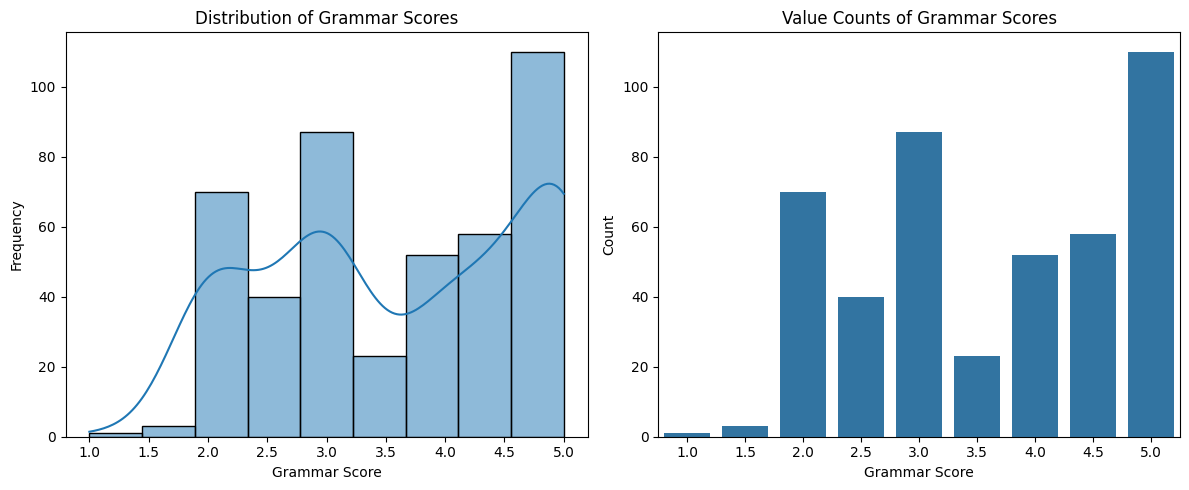


Value Counts for Grammar Scores:
GrammarScore
1.0      1
1.5      3
2.0     70
2.5     40
3.0     87
3.5     23
4.0     52
4.5     58
5.0    110
Name: count, dtype: int64

--- Audio Sample Exploration ---
Checking sample audio: audio_1261.wav (Score: 1.0)
Path: /root/.cache/kagglehub/competitions/shl-intern-hiring-assessment/dataset/audios_train/audio_1261.wav
File exists. Loading with librosa...
Sample Rate: 16000 Hz, Duration: 60.07s
Playing audio sample...


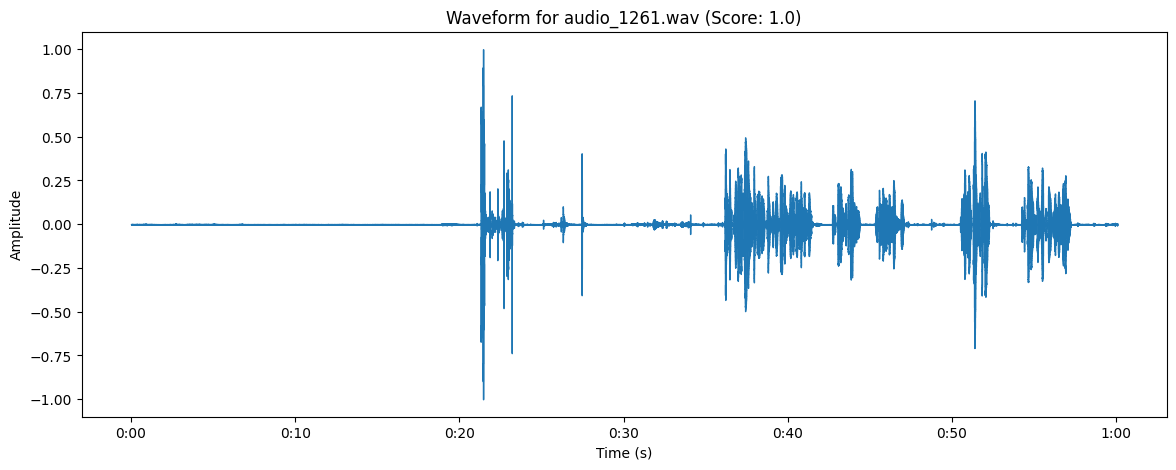

In [ ]:
if train_df is not None and test_df is not None and sample_sub_df is not None and 'GrammarScore' in train_df.columns:
    print("\n--- Proceeding with Data Exploration and Analysis ---")

    # --- Initial Data Exploration ---
    print("\n--- Training Data Info (Post Renaming) ---")
    print("Shape:", train_df.shape)
    print("Columns:", train_df.columns)
    print("\nHead:")
    print(train_df.head())
    print("\nDescribe (GrammarScore):")
    print(train_df[['GrammarScore']].describe())
    print("\nMissing values:")
    print(train_df.isnull().sum())

    print("\n--- Test Data Info (Post Renaming) ---")
    print("Shape:", test_df.shape)
    print("Columns:", test_df.columns)
    print("\nHead:")
    print(test_df.head())
    print("\nMissing values:")
    print(test_df.isnull().sum())

    print("\n--- Sample Submission Info (Post Renaming) ---")
    print("Shape:", sample_sub_df.shape)
    print("Columns:", sample_sub_df.columns)
    print("\nHead:")
    print(sample_sub_df.head())
    # --- Target Variable Analysis ---
    print("\n--- Grammar Score Analysis ---")
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    sns.histplot(train_df['GrammarScore'], kde=True, bins=len(train_df['GrammarScore'].unique()))
    plt.title('Distribution of Grammar Scores')
    plt.xlabel('Grammar Score')
    plt.ylabel('Frequency')
    plt.xticks(sorted(train_df['GrammarScore'].unique()))
    plt.subplot(1, 2, 2)
    score_counts = train_df['GrammarScore'].value_counts().sort_index()
    sns.barplot(x=score_counts.index, y=score_counts.values)
    plt.title('Value Counts of Grammar Scores')
    plt.xlabel('Grammar Score')
    plt.ylabel('Count')
    plt.xticks(ticks=range(len(score_counts)), labels=score_counts.index)
    plt.tight_layout()
    plt.show()
    print("\nValue Counts for Grammar Scores:")
    print(score_counts)
    # --- Audio Exploration ---
    print("\n--- Audio Sample Exploration ---")
    if not train_df.empty and 'audio_path' in train_df.columns:
        try:
            sample_idx = 0
            sample_audio_path = train_df['audio_path'].iloc[sample_idx]
            sample_score = train_df['GrammarScore'].iloc[sample_idx]
            sample_filename = train_df['AudioFile'].iloc[sample_idx]

            print(f"Checking sample audio: {sample_filename} (Score: {sample_score})")
            print(f"Path: {sample_audio_path}")

            if os.path.exists(sample_audio_path):
                print("File exists. Loading with librosa...")
                y, sr = librosa.load(sample_audio_path, sr=None)
                print(f"Sample Rate: {sr} Hz, Duration: {len(y)/sr:.2f}s")
                print("Playing audio sample...")
                ipd.display(ipd.Audio(sample_audio_path))
                plt.figure(figsize=(14, 5))
                librosa.display.waveshow(y, sr=sr)
                plt.title(f'Waveform for {sample_filename} (Score: {sample_score})')
                plt.xlabel("Time (s)")
                plt.ylabel("Amplitude")
                plt.show()
            else:
                print(f"ERROR: Audio file not found at path: {sample_audio_path}")
                print("Checking if audio train directory exists:", os.path.isdir(AUDIO_TRAIN_PATH))
                if os.path.isdir(AUDIO_TRAIN_PATH):
                     print("First few files in audio train dir:", os.listdir(AUDIO_TRAIN_PATH)[:5])

        except Exception as e:
            print(f"Error during audio sample exploration: {type(e).__name__}: {e}")
    else:
        print("Skipping audio sample exploration: train_df empty or 'audio_path' missing.")

else:
     print("\n--- Skipping Analysis and Exploration sections due to errors during data loading or renaming. Please check the error messages above. ---")





In [ ]:

!pip install -q openai-whisper
# !pip install --upgrade --force-reinstall setuptools # Sometimes needed after pip install

import whisper
import torch # Whisper uses PyTorch
import time

# --- Whisper Model Loading ---
# Choose model size: "tiny", "base", "small", "medium", "large"
# Smaller models are faster but less accurate. Start with "base" or "small".
MODEL_SIZE = "base"
print(f"Loading Whisper model: {MODEL_SIZE}")

# Check if GPU is available
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

try:
    # Load the model onto the available device
    whisper_model = whisper.load_model(MODEL_SIZE, device=device)
    print(f"Whisper model '{MODEL_SIZE}' loaded successfully on {device}.")
except Exception as e:
    print(f"Error loading Whisper model: {e}")
    whisper_model = None # Set to None if loading failed

# --- Transcribe a Sample Audio ---
if whisper_model and train_df is not None and 'audio_path' in train_df.columns:
    print("\n--- Transcribing Sample Audio ---")
    try:
        # Select a sample audio file (e.g., the first one again)
        sample_idx = 0
        sample_audio_path = train_df['audio_path'].iloc[sample_idx]
        sample_filename = train_df['AudioFile'].iloc[sample_idx]
        sample_score = train_df['GrammarScore'].iloc[sample_idx]

        print(f"Transcribing: {sample_filename} (Score: {sample_score})")
        print(f"Path: {sample_audio_path}")

        if os.path.exists(sample_audio_path):
            start_time = time.time()
            # Transcribe the audio
            # You can add parameters like language='en' if you know the language
            result = whisper_model.transcribe(sample_audio_path, fp16=(device=="cuda")) # fp16=False if using CPU or having issues
            end_time = time.time()

            transcription = result["text"]
            print(f"\nTranscription completed in {end_time - start_time:.2f} seconds.")
            print(f"\nTranscription Result:\n'{transcription}'")

            # Optional: Add transcription to the dataframe (for this one sample)
            # For processing all files later, we'll do this more systematically
            # train_df.loc[sample_idx, 'Transcription'] = transcription

        else:
            print(f"ERROR: Audio file not found at path: {sample_audio_path}")

    except Exception as e:
        print(f"\nAn error occurred during transcription: {type(e).__name__}: {e}")
else:
    print("\nSkipping transcription: Whisper model not loaded or train_df is missing.")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 800.5/800.5 kB 24.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 43.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 47.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 25.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 29.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s

100%|████████████████████████████████████████| 139M/139M [00:00<00:00, 188MiB/s]


Whisper model 'base' loaded successfully on cuda.

--- Transcribing Sample Audio ---
Transcribing: audio_1261.wav (Score: 1.0)
Path: /root/.cache/kagglehub/competitions/shl-intern-hiring-assessment/dataset/audios_train/audio_1261.wav

Transcription completed in 9.02 seconds.

Transcription Result:
' 1.5% 1.5% 1.5% 1.5% 1.5% 1.5% 1.5% 1.5% 1.5% 1.5% 1.5% 1.5% 1.5% 1.5% 1.5% 1.5% 2.5% 1.5% 1.6% 1.5% 1.5% 1.5% 1.5%. 1.5% 1.5%. 1.5%. 1.5%. and vegetables.'


In [ ]:
import whisper
import torch
import pandas as pd
import os
import time
from tqdm import tqdm # Use standard text-based tqdm
import re # For cleaning later

# --- Ensure previous variables are available ---
# Make sure train_df, test_df, whisper_model, and device are loaded from previous cells
if 'train_df' not in locals() or train_df is None:
    print("Error: train_df not found or is None. Please re-run the data loading cell.")
    # Optionally reload data
    # train_df = pd.read_csv("train_with_transcriptions.csv") # If previously saved
if 'test_df' not in locals() or test_df is None:
     print("Error: test_df not found or is None. Please re-run the data loading cell.")
     # test_df = pd.read_csv("test_with_transcriptions.csv") # If previously saved
if 'whisper_model' not in locals() or whisper_model is None:
    print("Error: whisper_model not found or is None. Please re-run the model loading cell.")
    # Optionally reload model
    # MODEL_SIZE = "base"
    # device = "cuda" if torch.cuda.is_available() else "cpu"
    # whisper_model = whisper.load_model(MODEL_SIZE, device=device)
if 'device' not in locals():
    device = "cuda" if torch.cuda.is_available() else "cpu"
    print(f"Device re-initialized to: {device}")


# --- Function to Transcribe and Clean ---
def transcribe_audio(audio_path, model, device):
    """Transcribes an audio file using the provided Whisper model and cleans the output."""
    if not os.path.exists(audio_path):
        # Don't print warning for every file, just return empty
        # print(f"Warning: File not found {audio_path}, returning empty string.")
        return ""
    try:
        # Transcribe
        result = model.transcribe(audio_path, fp16=(device=="cuda"))
        transcription = result["text"]

        # Basic Cleaning
        cleaned_transcription = transcription.strip()
        cleaned_transcription = re.sub(r'^(\s*[\d\.]+%)+', '', cleaned_transcription).strip()
        # Consider removing potential silence representations like "[silence]" if they appear
        # cleaned_transcription = cleaned_transcription.replace("[silence]", "").strip()

        return cleaned_transcription
    except Exception as e:
        # Print less verbosely during bulk processing
        # print(f"Error transcribing {os.path.basename(audio_path)}: {e}")
        return "" # Return empty string on error

# --- Process Training Data ---
if whisper_model and train_df is not None:
    print(f"\n--- Transcribing Training Audio Files ({len(train_df)} files) ---")
    transcriptions_train = []
    # Use tqdm (standard) for progress bar
    for audio_path in tqdm(train_df['audio_path'], desc="Training Files", unit="file"):
        transcription = transcribe_audio(audio_path, whisper_model, device)
        transcriptions_train.append(transcription)

    # Add transcriptions to the dataframe
    train_df['Transcription'] = transcriptions_train
    print("\nFinished transcribing training files.")
    # Display samples where transcription might have failed (empty string)
    print(f"Number of empty transcriptions in train: {(train_df['Transcription'] == '').sum()}")
    print("Sample transcriptions (head):")
    print(train_df[['AudioFile', 'GrammarScore', 'Transcription']].head())
else:
    print("Skipping training transcription.")

# --- Process Test Data ---
if whisper_model and test_df is not None:
    print(f"\n--- Transcribing Test Audio Files ({len(test_df)} files) ---")
    transcriptions_test = []
    # Use tqdm (standard) for progress bar
    for audio_path in tqdm(test_df['audio_path'], desc="Test Files", unit="file"):
        transcription = transcribe_audio(audio_path, whisper_model, device)
        transcriptions_test.append(transcription)

    # Add transcriptions to the dataframe
    test_df['Transcription'] = transcriptions_test
    print("\nFinished transcribing test files.")
    print(f"Number of empty transcriptions in test: {(test_df['Transcription'] == '').sum()}")
    print("Sample transcriptions (head):")
    print(test_df[['AudioFile', 'Transcription']].head())
else:
    print("Skipping test transcription.")

# --- Save intermediate results (optional but recommended) ---
# Save the dataframes with transcriptions to avoid re-running this long step
if train_df is not None:
    train_df.to_csv("train_with_transcriptions.csv", index=False)
    print("\nSaved training data with transcriptions to train_with_transcriptions.csv")
if test_df is not None:
    test_df.to_csv("test_with_transcriptions.csv", index=False)
    print("Saved test data with transcriptions to test_with_transcriptions.csv")



--- Transcribing Training Audio Files (444 files) ---


Training Files: 100%|██████████| 444/444 [33:04<00:00,  4.47s/file]



Finished transcribing training files.
Number of empty transcriptions in train: 1
Sample transcriptions (head):
        AudioFile  GrammarScore  \
0  audio_1261.wav           1.0   
1   audio_942.wav           1.5   
2  audio_1110.wav           1.5   
3  audio_1024.wav           1.5   
4   audio_538.wav           2.0   

                                       Transcription  
0  My favorite hobby is cultivation of plants suc...  
1  The playground looks like very clear and neat ...  
2  ۔Minegirl is to become an electrical employee ...  
3  My favorite place is in Andhra Pradesh. It is ...  
4  My favorite places, my favorite places, Mutti ...  

--- Transcribing Test Audio Files (195 files) ---


Test Files: 100%|██████████| 195/195 [11:25<00:00,  3.51s/file]


Finished transcribing test files.
Number of empty transcriptions in test: 0
Sample transcriptions (head):
        AudioFile                                      Transcription
0   audio_706.wav  .</p>< dh Strawberry Sister 3 SeRe free 7 7 7 ...
1   audio_800.wav  So, okay, initial insight is sub PharFind. my ...
2    audio_68.wav  At this market you can find a lot of things. A...
3  audio_1267.wav  My goal is I become an interpreter in the prem...
4   audio_683.wav  Okay, in the market, there is a lot of people,...

Saved training data with transcriptions to train_with_transcriptions.csv
Saved test data with transcriptions to test_with_transcriptions.csv


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.7/54.7 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.3/54.3 kB 3.4 MB/s eta 0:00:00
Loading data with transcriptions...
Loaded data successfully.
Train shape: (444, 4), Test shape: (195, 3)

Initializing LanguageTool (this may take a few seconds)...


INFO:language_tool_python.download_lt:Unzipping /tmp/tmps8xu07zm.zip to /root/.cache/language_tool_python.
INFO:language_tool_python.download_lt:Downloaded https://www.languagetool.org/download/LanguageTool-6.5.zip to /root/.cache/language_tool_python.


LanguageTool initialized successfully.

Calculating grammar error counts for training data...


Train Grammar Check: 100%|██████████| 444/444 [01:56<00:00,  3.82it/s]



Calculating grammar error counts for test data...


Test Grammar Check: 100%|██████████| 195/195 [00:26<00:00,  7.29it/s]



Finished calculating grammar errors.

Training Data Head with Error Count:
        AudioFile  GrammarScore  \
0  audio_1261.wav           1.0   
1   audio_942.wav           1.5   
2  audio_1110.wav           1.5   
3  audio_1024.wav           1.5   
4   audio_538.wav           2.0   

                                       Transcription  grammar_error_count  
0  My favorite hobby is cultivation of plants suc...                    4  
1  The playground looks like very clear and neat ...                    2  
2  ۔Minegirl is to become an electrical employee ...                   21  
3  My favorite place is in Andhra Pradesh. It is ...                    9  
4  My favorite places, my favorite places, Mutti ...                   11  

Test Data Head with Error Count:
        AudioFile                                      Transcription  \
0   audio_706.wav  .</p>< dh Strawberry Sister 3 SeRe free 7 7 7 ...   
1   audio_800.wav  So, okay, initial insight is sub PharFind. my ...   
2    au

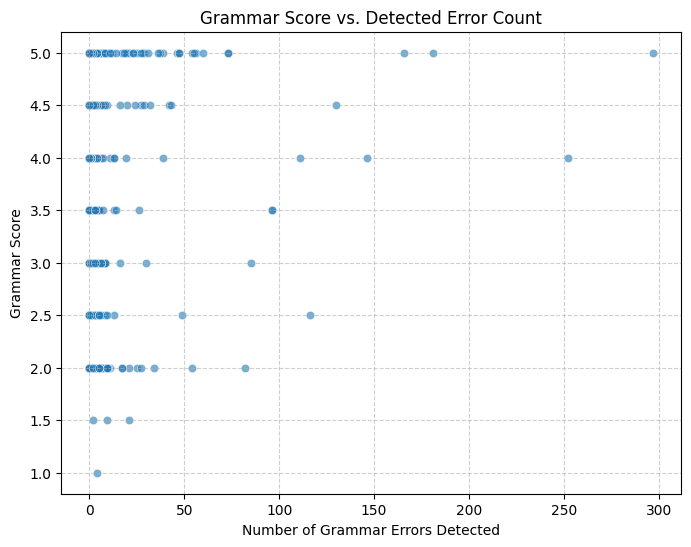


Saved data with error counts to *_with_errors.csv


In [ ]:
# Install language_tool_python
!pip install -q language_tool_python

import language_tool_python
import pandas as pd
from tqdm import tqdm
import time

# --- Load Data with Transcriptions ---
# It's safer to load from the saved CSVs in case the kernel restarted or variables were lost
print("Loading data with transcriptions...")
try:
    train_df = pd.read_csv("train_with_transcriptions.csv")
    test_df = pd.read_csv("test_with_transcriptions.csv")
    # Handle potential NaN values in Transcription column from loading CSV
    train_df['Transcription'].fillna('', inplace=True)
    test_df['Transcription'].fillna('', inplace=True)
    print("Loaded data successfully.")
    print(f"Train shape: {train_df.shape}, Test shape: {test_df.shape}")
except FileNotFoundError:
    print("ERROR: *_with_transcriptions.csv files not found. Please ensure the transcription step ran successfully and saved the files.")
    # Stop execution if files are missing
    raise SystemExit("Stopping: Missing transcription files.")

# --- Initialize LanguageTool ---
print("\nInitializing LanguageTool (this may take a few seconds)...")
# Specify the language (e.g., 'en-US' or 'en-GB')
# Use 'en-US' as a default, adjust if needed based on expected speaker origin
try:
    lang_tool = language_tool_python.LanguageTool('en-US')
    print("LanguageTool initialized successfully.")
except Exception as e:
    print(f"Error initializing LanguageTool: {e}")
    print("Please ensure Java is installed and accessible if you see Java-related errors.")
    lang_tool = None # Set to None if failed

# --- Function to Count Grammar Errors ---
def count_grammar_errors(text, tool):
    """Counts grammar errors in a text using LanguageTool."""
    if not isinstance(text, str) or not text.strip():
        return 0 # Return 0 for empty or non-string input
    try:
        matches = tool.check(text)
        # Filter out potential non-grammar related rules if necessary
        # For now, count all matches as potential indicators
        return len(matches)
    except Exception as e:
        # Handle potential errors during checking (e.g., timeouts, tool errors)
        # print(f"Error checking text: {text[:50]}... Error: {e}")
        return 0 # Return 0 on error for robustness

# --- Apply Grammar Check to DataFrames ---
if lang_tool and train_df is not None and test_df is not None:
    print("\nCalculating grammar error counts for training data...")
    # Apply the function row-wise using tqdm for progress
    tqdm.pandas(desc="Train Grammar Check")
    train_df['grammar_error_count'] = train_df['Transcription'].progress_apply(lambda x: count_grammar_errors(x, lang_tool))

    print("\nCalculating grammar error counts for test data...")
    tqdm.pandas(desc="Test Grammar Check")
    test_df['grammar_error_count'] = test_df['Transcription'].progress_apply(lambda x: count_grammar_errors(x, lang_tool))

    print("\nFinished calculating grammar errors.")
    print("\nTraining Data Head with Error Count:")
    print(train_df[['AudioFile', 'GrammarScore', 'Transcription', 'grammar_error_count']].head())

    print("\nTest Data Head with Error Count:")
    print(test_df[['AudioFile', 'Transcription', 'grammar_error_count']].head())

    # --- Analyze the new feature ---
    print("\nCorrelation between GrammarScore and grammar_error_count:")
    try:
        correlation = train_df['GrammarScore'].corr(train_df['grammar_error_count'])
        print(f"Pearson Correlation: {correlation:.4f}")

        # Plot score vs error count
        plt.figure(figsize=(8, 6))
        sns.scatterplot(data=train_df, x='grammar_error_count', y='GrammarScore', alpha=0.6)
        plt.title('Grammar Score vs. Detected Error Count')
        plt.xlabel('Number of Grammar Errors Detected')
        plt.ylabel('Grammar Score')
        plt.grid(True, linestyle='--', alpha=0.6)
        plt.show()

    except Exception as e:
        print(f"Could not calculate correlation or plot: {e}")

    # Save results again
    train_df.to_csv("train_with_errors.csv", index=False)
    test_df.to_csv("test_with_errors.csv", index=False)
    print("\nSaved data with error counts to *_with_errors.csv")

else:
    print("\nSkipping grammar check: LanguageTool not initialized or dataframes not loaded.")


In [ ]:

!pip install -q sentence-transformers

import pandas as pd
import numpy as np
from sentence_transformers import SentenceTransformer
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import Ridge # A good baseline regressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import time
import matplotlib.pyplot as plt
import seaborn as sns


# --- Load Data with Transcriptions ---
# (Assuming train_df and test_df still hold the data with 'Transcription' column)
# If not, reload from 'train_with_transcriptions.csv' and 'test_with_transcriptions.csv'
print("Loading data with transcriptions (or using existing dataframes)...")
try:
    if 'train_df' not in locals() or 'Transcription' not in train_df.columns:
        train_df = pd.read_csv("train_with_transcriptions.csv")
        train_df['Transcription'].fillna('', inplace=True)
        print("Loaded train_df from CSV.")
    if 'test_df' not in locals() or 'Transcription' not in test_df.columns:
        test_df = pd.read_csv("test_with_transcriptions.csv")
        test_df['Transcription'].fillna('', inplace=True)
        print("Loaded test_df from CSV.")

    # Ensure transcriptions are strings
    train_df['Transcription'] = train_df['Transcription'].astype(str)
    test_df['Transcription'] = test_df['Transcription'].astype(str)

    print(f"Data ready. Train shape: {train_df.shape}, Test shape: {test_df.shape}")

except FileNotFoundError:
    print("ERROR: *_with_transcriptions.csv files not found. Please ensure the transcription step ran successfully.")
    raise SystemExit("Stopping: Missing transcription files.")
except Exception as e:
    print(f"Error loading data: {e}")
    raise SystemExit("Stopping: Data loading error.")


# --- Load Sentence Transformer Model ---
print("\nLoading Sentence Transformer model (e.g., all-MiniLM-L6-v2)...")
# This will download the model the first time it's run
try:
    # Use a model known for good performance and efficiency
    embedder = SentenceTransformer('all-MiniLM-L6-v2', device='cpu') # Specify CPU; use 'cuda' if GPU available & PyTorch is CUDA-enabled
    print("Sentence Transformer model loaded.")
except Exception as e:
    print(f"Error loading Sentence Transformer model: {e}")
    embedder = None


# --- Generate Embeddings ---
if embedder and train_df is not None and test_df is not None:
    print("\nGenerating embeddings for training data...")
    start_time = time.time()
    # Convert transcriptions to list for the embedder
    train_texts = train_df['Transcription'].tolist()
    # Generate embeddings (this can take time)
    train_embeddings = embedder.encode(train_texts, show_progress_bar=True)
    end_time = time.time()
    print(f"Finished training embeddings in {end_time - start_time:.2f} seconds.")
    print(f"Shape of training embeddings: {train_embeddings.shape}") # Should be (num_samples, embedding_dim) e.g. (444, 384)

    print("\nGenerating embeddings for test data...")
    start_time = time.time()
    test_texts = test_df['Transcription'].tolist()
    test_embeddings = embedder.encode(test_texts, show_progress_bar=True)
    end_time = time.time()
    print(f"Finished test embeddings in {end_time - start_time:.2f} seconds.")
    print(f"Shape of test embeddings: {test_embeddings.shape}") # Should be (195, embedding_dim)

    # --- Model Training and Evaluation (Cross-Validation) ---
    print("\n--- Training Regression Model (Ridge) with Cross-Validation ---")
    X = train_embeddings
    y = train_df['GrammarScore'].values

    # Define the model pipeline: StandardScaler + Ridge Regression
    # Scaling is often beneficial for linear models like Ridge
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('ridge', Ridge(alpha=1.0)) # alpha is the regularization strength, 1.0 is a common default
    ])

    # Set up K-Fold cross-validation
    n_splits = 5 # Number of folds
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

    # Use Root Mean Squared Error (RMSE) as the metric (common for regression)
    # Note: cross_val_score uses 'neg_mean_squared_error', so we'll negate and sqrt it
    print(f"Performing {n_splits}-Fold Cross-Validation...")
    cv_neg_mse_scores = cross_val_score(pipeline, X, y, cv=kf, scoring='neg_mean_squared_error', n_jobs=-1) # Use all available CPU cores

    # Convert scores to positive RMSE
    cv_rmse_scores = np.sqrt(-cv_neg_mse_scores)

    print(f"\nCross-Validation RMSE Scores for each fold: {cv_rmse_scores}")
    print(f"Average CV RMSE: {np.mean(cv_rmse_scores):.4f}")
    print(f"Standard Deviation of CV RMSE: {np.std(cv_rmse_scores):.4f}")

    # --- Final Model Training (on all training data) ---
    print("\nTraining final model on all training data...")
    pipeline.fit(X, y)
    print("Final model trained.")

    # --- Prepare for Submission (Generate Test Predictions) ---
    print("\nGenerating predictions for the test set...")
    test_predictions = pipeline.predict(test_embeddings)

    # Clip predictions to the valid range [0, 5] as per competition rules
    test_predictions_clipped = np.clip(test_predictions, 0, 5)
    print("Test predictions generated and clipped to [0, 5].")

    # --- Create Submission File ---
    submission_df = pd.DataFrame({
        'filename': test_df['AudioFile'], # Use original 'AudioFile' column name
        'label': test_predictions_clipped # Use 'label' as required by sample submission
    })

    # Round predictions? (Optional, depends on competition specifics, usually not required for scores)
    # submission_df['label'] = submission_df['label'].round(1) # Example: round to 1 decimal place

    submission_df.to_csv('submission.csv', index=False)
    print("\nSubmission file 'submission.csv' created successfully.")
    print("Submission file head:")
    print(submission_df.head())

else:
    print("\nSkipping embedding generation and model training: Embedder not loaded or dataframes missing.")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 107.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 85.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 57.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 211.5/211.5 MB 166.6 MB/s eta 0:00:01
ERROR: Operation cancelled by user
Loading data with transcriptions (or using existing dataframes)...
Loaded train_df from CSV.
Loaded test_df from CSV.
Data ready. Train shape: (444, 4), Test shape: (195, 3)

Loading Sentence Transformer model (e.g., all-MiniLM-L6-v2)...


<ipython-input-1-23647859b43a>:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Transcription'].fillna('', inplace=True)
<ipython-input-1-23647859b43a>:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Sentence Transformer model loaded.

Generating embeddings for training data...


Batches:   0%|          | 0/14 [00:00<?, ?it/s]

Finished training embeddings in 39.10 seconds.
Shape of training embeddings: (444, 384)

Generating embeddings for test data...


Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Finished test embeddings in 15.26 seconds.
Shape of test embeddings: (195, 384)

--- Training Regression Model (Ridge) with Cross-Validation ---
Performing 5-Fold Cross-Validation...

Cross-Validation RMSE Scores for each fold: [2.36867354 2.06862434 1.85670462 2.24549762 2.21715265]
Average CV RMSE: 2.1513
Standard Deviation of CV RMSE: 0.1755

Training final model on all training data...
Final model trained.

Generating predictions for the test set...
Test predictions generated and clipped to [0, 5].

Submission file 'submission.csv' created successfully.
Submission file head:
         filename     label
0   audio_706.wav  5.000000
1   audio_800.wav  1.279386
2    audio_68.wav  2.620341
3  audio_1267.wav  3.912692
4   audio_683.wav  1.792434


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 89.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 102.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
Loading data with transcriptions...
Data ready. Train shape: (444, 4), Test shape: (195, 3)

Loading models...
Loading all-mpnet-base-v2 model (this may take a moment)...


<ipython-input-2-c8fd319b6e57>:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Transcription'].fillna('', inplace=True)
<ipython-input-2-c8fd319b6e57>:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.4k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Sentence Transformer model loaded.
Loading spaCy model...
spaCy model loaded.

Extracting linguistic features...


Test Features: 100%|██████████| 195/195 [00:04<00:00, 46.25it/s]

Generating embeddings for training data...


Batches:   0%|          | 0/14 [00:00<?, ?it/s]

Shape of training embeddings: (444, 768)

Generating embeddings for test data...


Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Shape of test embeddings: (195, 768)

Combining features...
Final training feature set shape: (444, 779)
Final test feature set shape: (195, 779)

--- Evaluating Models with Cross-Validation ---
Ridge - Average CV RMSE: 3.6767 ± 4.5945
ElasticNet - Average CV RMSE: 1.1133 ± 0.0320
SVR - Average CV RMSE: 0.8764 ± 0.0390
RandomForest - Average CV RMSE: 0.9465 ± 0.0447
GradientBoosting - Average CV RMSE: 0.9432 ± 0.0646

--- Hyperparameter Tuning ---
Running GridSearchCV for GradientBoosting...
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters: {'gradientboostingregressor__learning_rate': 0.05, 'gradientboostingregressor__max_depth': 3, 'gradientboostingregressor__min_samples_split': 5, 'gradientboostingregressor__n_estimators': 100}
Best RMSE: 0.9347

--- Training Final Models ---
Ensemble Model - Average CV RMSE: 1.9391 ± 1.0355
Training final ensemble model on all data...

Generating predictions for the test set...

Submission file 'submission.csv' created su

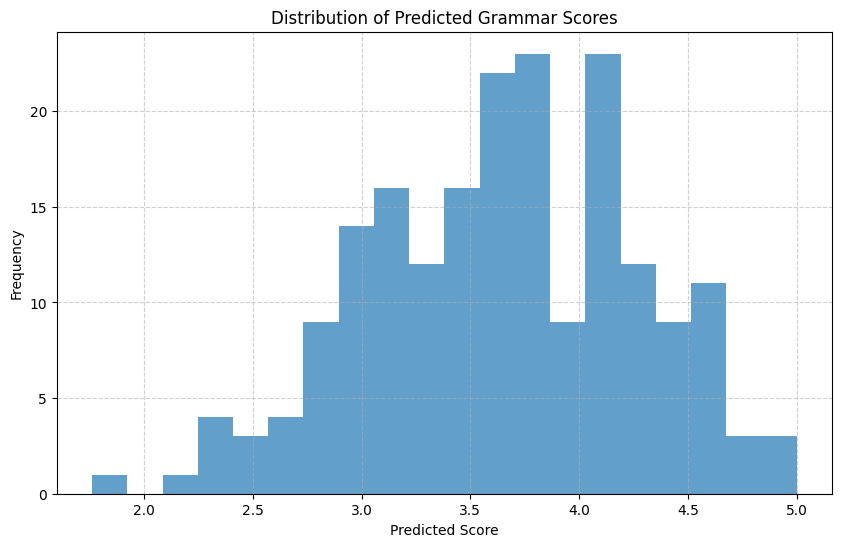

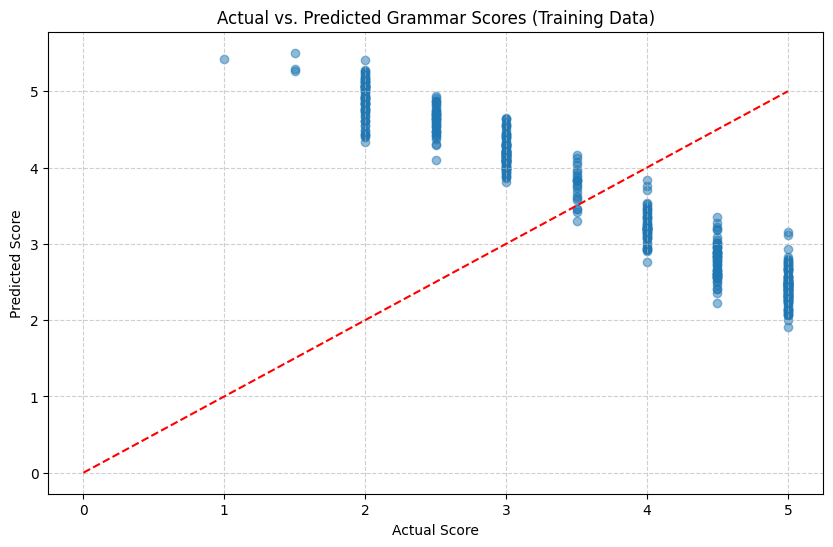


RMSE on training data: 2.0699209238462957


In [ ]:

!pip install -q sentence-transformers spacy
!python -m spacy download en_core_web_sm

import pandas as pd
import numpy as np
from sentence_transformers import SentenceTransformer
import spacy
import re
from tqdm import tqdm
import time
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import Ridge, ElasticNet
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, StackingRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error

# --- Load Data ---
print("Loading data with transcriptions...")
try:
    train_df = pd.read_csv("train_with_transcriptions.csv")
    test_df = pd.read_csv("test_with_transcriptions.csv")
    train_df['Transcription'].fillna('', inplace=True)
    test_df['Transcription'].fillna('', inplace=True)

    # Ensure transcriptions are strings
    train_df['Transcription'] = train_df['Transcription'].astype(str)
    test_df['Transcription'] = test_df['Transcription'].astype(str)

    print(f"Data ready. Train shape: {train_df.shape}, Test shape: {test_df.shape}")

except Exception as e:
    print(f"Error loading data: {e}")
    raise SystemExit("Stopping due to data loading error.")

# --- Load Models ---
print("\nLoading models...")
try:
    # More powerful sentence transformer model
    print("Loading all-mpnet-base-v2 model (this may take a moment)...")
    embedder = SentenceTransformer('all-mpnet-base-v2')
    print("Sentence Transformer model loaded.")

    # Load spaCy for linguistic features
    print("Loading spaCy model...")
    nlp = spacy.load('en_core_web_sm')
    print("spaCy model loaded.")
except Exception as e:
    print(f"Error loading models: {e}")
    raise SystemExit("Stopping due to model loading error.")

# --- Feature Engineering ---
def extract_linguistic_features(text):
    """Extract linguistic features using spaCy."""
    if not isinstance(text, str) or not text.strip():
        # Return zeros for empty texts
        return {
            'word_count': 0,
            'sentence_count': 0,
            'avg_words_per_sent': 0,
            'unique_words_ratio': 0,
            'avg_word_length': 0,
            'noun_count': 0,
            'verb_count': 0,
            'adj_count': 0,
            'adv_count': 0,
            'punct_count': 0,
            'noun_verb_ratio': 0
        }

    try:
        # Process with spaCy
        doc = nlp(text)

        # Count sentences
        sentences = list(doc.sents)
        sentence_count = len(sentences)

        # Count tokens, excluding punctuation
        tokens = [token for token in doc if not token.is_punct and not token.is_space]
        word_count = len(tokens)

        # Count unique words (case-insensitive)
        unique_words = set([token.text.lower() for token in tokens])
        unique_word_count = len(unique_words)

        # Calculate average word length
        if word_count > 0:
            avg_word_length = sum(len(token.text) for token in tokens) / word_count
        else:
            avg_word_length = 0

        # Count POS tags
        noun_count = len([token for token in doc if token.pos_ == "NOUN"])
        verb_count = len([token for token in doc if token.pos_ == "VERB"])
        adj_count = len([token for token in doc if token.pos_ == "ADJ"])
        adv_count = len([token for token in doc if token.pos_ == "ADV"])
        punct_count = len([token for token in doc if token.is_punct])

        # Calculate ratios
        if sentence_count > 0:
            avg_words_per_sent = word_count / sentence_count
        else:
            avg_words_per_sent = 0

        if word_count > 0:
            unique_words_ratio = unique_word_count / word_count
        else:
            unique_words_ratio = 0

        if verb_count > 0:
            noun_verb_ratio = noun_count / verb_count
        else:
            noun_verb_ratio = 0 if noun_count == 0 else 999  # Arbitrary high value if nouns but no verbs

        return {
            'word_count': word_count,
            'sentence_count': sentence_count,
            'avg_words_per_sent': avg_words_per_sent,
            'unique_words_ratio': unique_words_ratio,
            'avg_word_length': avg_word_length,
            'noun_count': noun_count,
            'verb_count': verb_count,
            'adj_count': adj_count,
            'adv_count': adv_count,
            'punct_count': punct_count,
            'noun_verb_ratio': noun_verb_ratio
        }
    except Exception as e:
        print(f"Error processing text: {text[:30]}... - {e}")
        # Return zeros on error
        return {
            'word_count': 0,
            'sentence_count': 0,
            'avg_words_per_sent': 0,
            'unique_words_ratio': 0,
            'avg_word_length': 0,
            'noun_count': 0,
            'verb_count': 0,
            'adj_count': 0,
            'adv_count': 0,
            'punct_count': 0,
            'noun_verb_ratio': 0
        }

# --- Extract Features ---
print("\nExtracting linguistic features...")
# Process training data
train_linguistic_features = []
for text in tqdm(train_df['Transcription'], desc="Training Features"):
    train_linguistic_features.append(extract_linguistic_features(text))

# Process test data
test_linguistic_features = []
for text in tqdm(test_df['Transcription'], desc="Test Features"):
    test_linguistic_features.append(extract_linguistic_features(text))

# Convert to DataFrames
train_ling_df = pd.DataFrame(train_linguistic_features)
test_ling_df = pd.DataFrame(test_linguistic_features)

print("Generating embeddings for training data...")
train_texts = train_df['Transcription'].tolist()
train_embeddings = embedder.encode(train_texts, show_progress_bar=True)
print(f"Shape of training embeddings: {train_embeddings.shape}")

print("\nGenerating embeddings for test data...")
test_texts = test_df['Transcription'].tolist()
test_embeddings = embedder.encode(test_texts, show_progress_bar=True)
print(f"Shape of test embeddings: {test_embeddings.shape}")

# --- Combine Features ---
print("\nCombining features...")
# Convert embeddings to DataFrame
train_emb_df = pd.DataFrame(train_embeddings, columns=[f'emb_{i}' for i in range(train_embeddings.shape[1])])
test_emb_df = pd.DataFrame(test_embeddings, columns=[f'emb_{i}' for i in range(test_embeddings.shape[1])])

# Combine embeddings with linguistic features
X_train = pd.concat([train_emb_df, train_ling_df], axis=1)
X_test = pd.concat([test_emb_df, test_ling_df], axis=1)

# Target variable
y_train = train_df['GrammarScore'].values

print(f"Final training feature set shape: {X_train.shape}")
print(f"Final test feature set shape: {X_test.shape}")

# --- Model Evaluation ---
print("\n--- Evaluating Models with Cross-Validation ---")
# Set up cross-validation
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Define models to evaluate
base_models = {
    'Ridge': Ridge(alpha=1.0),
    'ElasticNet': ElasticNet(alpha=1.0, l1_ratio=0.5),
    'SVR': SVR(kernel='rbf', C=1.0, gamma='scale'),
    'RandomForest': RandomForestRegressor(n_estimators=100, random_state=42),
    'GradientBoosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
}

# Evaluate each model
model_scores = {}
for name, model in base_models.items():
    pipeline = Pipeline([('scaler', StandardScaler()), (name, model)])
    cv_scores = cross_val_score(pipeline, X_train, y_train, cv=kf, scoring='neg_mean_squared_error', n_jobs=-1)
    rmse_scores = np.sqrt(-cv_scores)
    model_scores[name] = rmse_scores
    print(f"{name} - Average CV RMSE: {np.mean(rmse_scores):.4f} ± {np.std(rmse_scores):.4f}")

# --- Hyperparameter Tuning ---
print("\n--- Hyperparameter Tuning ---")
# Select best performing model(s) for tuning
# Example: tuning GradientBoosting
param_grid = {
    'gradientboostingregressor__n_estimators': [100, 200],
    'gradientboostingregressor__learning_rate': [0.05, 0.1],
    'gradientboostingregressor__max_depth': [3, 5],
    'gradientboostingregressor__min_samples_split': [2, 5]
}

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('gradientboostingregressor', GradientBoostingRegressor(random_state=42))
])

grid_search = GridSearchCV(
    pipeline, param_grid, cv=kf, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1
)

print("Running GridSearchCV for GradientBoosting...")
grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best RMSE: {np.sqrt(-grid_search.best_score_):.4f}")

# --- Train Final Models ---
print("\n--- Training Final Models ---")
# Extract best parameters
best_gb_params = {}
for param, value in grid_search.best_params_.items():
    # Extract parameter name without the prefix
    param_name = param.split('__')[1]
    best_gb_params[param_name] = value

# Create optimized models
gb_model = GradientBoostingRegressor(**best_gb_params, random_state=42)
rf_model = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42)
ridge_model = Ridge(alpha=1.0)

# Create a stacking ensemble
estimators = [
    ('gb', gb_model),
    ('rf', rf_model),
    ('ridge', ridge_model)
]

# Define final model as stacking regressor with Ridge as final estimator
final_model = Pipeline([
    ('scaler', StandardScaler()),
    ('stacking', StackingRegressor(
        estimators=estimators,
        final_estimator=Ridge(alpha=0.1),
        cv=3
    ))
])

# Cross-validate final model
cv_scores = cross_val_score(final_model, X_train, y_train, cv=kf, scoring='neg_mean_squared_error', n_jobs=-1)
rmse_scores = np.sqrt(-cv_scores)
print(f"Ensemble Model - Average CV RMSE: {np.mean(rmse_scores):.4f} ± {np.std(rmse_scores):.4f}")

# Train on all data
print("Training final ensemble model on all data...")
final_model.fit(X_train, y_train)

# --- Generate Predictions ---
print("\nGenerating predictions for the test set...")
test_predictions = final_model.predict(X_test)
test_predictions_clipped = np.clip(test_predictions, 0, 5)

# --- Create Submission File ---
submission_df = pd.DataFrame({
    'filename': test_df['AudioFile'],
    'label': test_predictions_clipped
})

submission_df.to_csv('submission1.csv', index=False)
print("\nSubmission file 'submission.csv' created successfully.")
print("Submission file head:")
print(submission_df.head())

# --- Analyze Predictions ---
plt.figure(figsize=(10, 6))
plt.hist(test_predictions_clipped, bins=20, alpha=0.7)
plt.title('Distribution of Predicted Grammar Scores')
plt.xlabel('Predicted Score')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Scatter plot of actual vs. predicted for training data
train_preds = final_model.predict(X_train)
plt.figure(figsize=(10, 6))
plt.scatter(y_train, train_preds, alpha=0.5)
plt.plot([0, 5], [0, 5], 'r--')
plt.title('Actual vs. Predicted Grammar Scores (Training Data)')
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

print("\nRMSE on training data:", np.sqrt(mean_squared_error(y_train, train_preds)))

In [ ]:
# Install required libraries
!pip install -q sentence-transformers spacy
!python -m spacy download en_core_web_sm

# Imports
import pandas as pd
import numpy as np
from sentence_transformers import SentenceTransformer
import spacy
from tqdm import tqdm

# Load data
train_df = pd.read_csv("train_with_transcriptions.csv")
test_df = pd.read_csv("test_with_transcriptions.csv")

train_df['Transcription'].fillna('', inplace=True)
test_df['Transcription'].fillna('', inplace=True)

# Load models
embedder = SentenceTransformer('all-mpnet-base-v2')
nlp = spacy.load('en_core_web_sm')

# Linguistic feature extraction
def extract_linguistic_features(text):
    if not isinstance(text, str) or not text.strip():
        return {
            'word_count': 0, 'sentence_count': 0, 'avg_words_per_sent': 0,
            'unique_words_ratio': 0, 'avg_word_length': 0,
            'noun_count': 0, 'verb_count': 0, 'adj_count': 0,
            'adv_count': 0, 'punct_count': 0, 'noun_verb_ratio': 0
        }

    doc = nlp(text)
    sentences = list(doc.sents)
    tokens = [token for token in doc if not token.is_punct and not token.is_space]
    word_count = len(tokens)
    unique_word_count = len(set([token.text.lower() for token in tokens]))

    return {
        'word_count': word_count,
        'sentence_count': len(sentences),
        'avg_words_per_sent': word_count / len(sentences) if sentences else 0,
        'unique_words_ratio': unique_word_count / word_count if word_count else 0,
        'avg_word_length': np.mean([len(token.text) for token in tokens]) if tokens else 0,
        'noun_count': len([token for token in doc if token.pos_ == "NOUN"]),
        'verb_count': len([token for token in doc if token.pos_ == "VERB"]),
        'adj_count': len([token for token in doc if token.pos_ == "ADJ"]),
        'adv_count': len([token for token in doc if token.pos_ == "ADV"]),
        'punct_count': len([token for token in doc if token.is_punct]),
        'noun_verb_ratio': len([token for token in doc if token.pos_ == "NOUN"]) / len([token for token in doc if token.pos_ == "VERB"]) if len([token for token in doc if token.pos_ == "VERB"]) else 0
    }

# Extract linguistic features
train_ling_features = [extract_linguistic_features(text) for text in tqdm(train_df['Transcription'], desc="Train Linguistic")]
test_ling_features = [extract_linguistic_features(text) for text in tqdm(test_df['Transcription'], desc="Test Linguistic")]

train_ling_df = pd.DataFrame(train_ling_features)
test_ling_df = pd.DataFrame(test_ling_features)

# Generate embeddings
train_embeddings = embedder.encode(train_df['Transcription'].tolist(), show_progress_bar=True)
test_embeddings = embedder.encode(test_df['Transcription'].tolist(), show_progress_bar=True)

train_emb_df = pd.DataFrame(train_embeddings, columns=[f'emb_{i}' for i in range(train_embeddings.shape[1])])
test_emb_df = pd.DataFrame(test_embeddings, columns=[f'emb_{i}' for i in range(test_embeddings.shape[1])])

# Final feature sets
X_train = pd.concat([train_emb_df, train_ling_df], axis=1)
X_test = pd.concat([test_emb_df, test_ling_df], axis=1)
y_train = train_df['GrammarScore'].values


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 80.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 59.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 34.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 892.6 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 49.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 91.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload

<ipython-input-2-a54c0279b933>:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Transcription'].fillna('', inplace=True)
<ipython-input-2-a54c0279b933>:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.4k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Test Linguistic: 100%|██████████| 195/195 [00:06<00:00, 29.06it/s]


Batches:   0%|          | 0/14 [00:00<?, ?it/s]

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

In [ ]:
# submission using our best individual model (SVR) instead of the ensemble
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline

# Assuming X_train, y_train, and X_test are still in memory from previous run
# If not, you'll need to recreate them

# Create optimized SVR pipeline
svr_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svr', SVR(kernel='rbf', C=2.0, gamma='scale', epsilon=0.1))
])

# Train on all data
print("Training SVR model on all data...")
svr_pipeline.fit(X_train, y_train)

# Generate predictions
print("Generating SVR predictions for the test set...")
svr_predictions = svr_pipeline.predict(X_test)
svr_predictions_clipped = np.clip(svr_predictions, 0, 5)

# Create submission file
svr_submission_df = pd.DataFrame({
    'filename': test_df['AudioFile'],
    'label': svr_predictions_clipped
})

svr_submission_df.to_csv('svr_submission.csv', index=False)
print("\nSVR Submission file created successfully.")
print("SVR Submission file head:")
print(svr_submission_df.head())

# Optional: Also try RandomForest which performed well
from sklearn.ensemble import RandomForestRegressor

rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestRegressor(n_estimators=200, max_depth=8, random_state=42))
])

print("\nTraining RandomForest model on all data...")
rf_pipeline.fit(X_train, y_train)

rf_predictions = rf_pipeline.predict(X_test)
rf_predictions_clipped = np.clip(rf_predictions, 0, 5)

rf_submission_df = pd.DataFrame({
    'filename': test_df['AudioFile'],
    'label': rf_predictions_clipped
})

rf_submission_df.to_csv('rf_submission.csv', index=False)
print("RandomForest Submission file created successfully.")

Training SVR model on all data...
Generating SVR predictions for the test set...

SVR Submission file created successfully.
SVR Submission file head:
         filename     label
0   audio_706.wav  3.729408
1   audio_800.wav  3.087088
2    audio_68.wav  3.849185
3  audio_1267.wav  2.854633
4   audio_683.wav  2.686532

Training RandomForest model on all data...
RandomForest Submission file created successfully.
